We want to minimize the following expectation
$$\underset{\phi}{\min} \mathbb{E}_{q_\phi (x)}[f(x)]$$
We need to compute the gradient w.r.t. $\phi$. We apply the likelihood ratio trick:

\begin{eqnarray}
\nabla_\phi \mathbb{E}_{q_\phi (x)}[f(x)] & = & \nabla_\phi \sum_x q_\phi (x) f(x) \\
& = & \sum_x \nabla_\phi q_\phi (x) f(x) \\
& = & \sum_x q_\phi (x) \frac{\nabla_\phi q_\phi (x)}{q_\phi (x)} f(x)\\
& = & \mathbb{E}_{q_\phi (x)} \nabla_\phi \log q_\phi(x) f(x) \\
& = & \frac{1}{K} \sum_{i = 1}^K \nabla_\phi \log q_\phi (x^{(i)}) f(x^{(i)})
\end{eqnarray}
where $x^{(i)} \sim q_\phi (x)$.

This Likelihood Ratio Gradient has high variance, especially in higher dimensional spaces.
An example in 2D:

Minimize the following loss function:

\begin{eqnarray}
\mathcal{L} = \mathbb{E}_{\mathcal{N}(\mu, I)} \left[\left\lvert\left\lvert x - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right\rvert\right\rvert_2^2 \right]
\end{eqnarray}


Apply the formula

\begin{eqnarray}
\nabla_\mu \mathcal{L} & = & \mathbb{E}\left[\nabla_\mu \log \left(\exp\left(-\frac{1}{2} (x - \mu)^\top I (x-\mu) \right)\right) f(x)\right] \\
& = & \mathbb{E} \left[\left\lvert\left\lvert x - \left[
\begin{matrix} 5 \\ 5 \end{matrix}
\right] \right\rvert\right\rvert_2^2 \nabla_\mu -\frac{1}{2} (x - \mu)^\top (x-\mu)  \right] \\
& = & \mathbb{E} \left[  \left\lvert\left\lvert x - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right\rvert\right\rvert_2^2 (x - \mu) \right]
\end{eqnarray}


In [26]:
import numpy as np
from matplotlib import pyplot as plt

mu = np.array([0, 0])
target = np.array([5, 5])
I = np.array([[1, 0], [0, 1]])
n=40

x = np.random.multivariate_normal(mean=mu, cov=I, size=(n,))

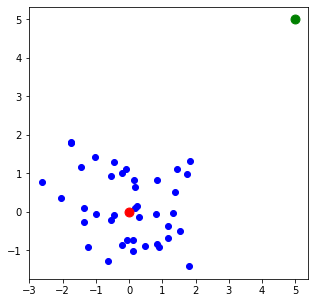

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(x[:, 0], x[:, 1], c='b')

ax.scatter(mu[0], mu[1], c='r', s=80)
ax.scatter(target[0], target[1], c='g', s=80)

In [28]:
def loss(z, target):
    return (np.linalg.norm(z - target, axis=1) ** 2).mean()

def lrg(z, mu, target):
    norm = np.linalg.norm(z - target, axis=1) ** 2
    # print('norm', norm)
    # print('z - mu', z - mu)
    grad = (norm[:, np.newaxis] * (z - mu)).mean(axis=0)

    # print('grad', grad)

    return grad

def train(mu, target, loss, lr, n_train, n_test, n_iter=10, viz=False):
    for it in range(n_iter):

        z = np.random.multivariate_normal(mean=mu, cov=I, size=n_train)
        pmu = mu
        lrgi = lrg(z, mu, target)
        mu = mu - lr * lrgi

        # visualization
        if viz:
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            ax.set_xlim(-5, 6)
            ax.set_ylim(-5, 6)
            ax.scatter(z[:, 0], z[:, 1], c='b')

            ax.scatter(pmu[0], pmu[1], c='r', s=80, alpha=0.5)
            ax.scatter(mu[0], mu[1], c='r', s=80)
            ax.arrow(pmu[0], pmu[1], mu[0] - pmu[0], mu[1] - pmu[1], head_width=0.1)
            ax.scatter(target[0], target[1], c='g', s=80)

        z_test = np.random.multivariate_normal(mean=mu, cov=I, size=n_test)
        lossi = loss(z_test, target)
        print(it, lossi)

When `n_train = 1`, the training is very unstable.
It diverges when `lr = 0.1` and converges slowly when `lr = 0.01`.

It is interesting to analyze the learning dynamic of the algorithm:

When `lr` is large, if we sample a bad datapoint (a datapoint closer to `target` than `mu`),
then `mu` is pushed further away from `target` by a large amount.
The error grows exponentially.

When `lr` is small, if a bad datapoint is sampled, `mu` moved by a only a small amount.
That (small) wrong update is corrected by other datapoints sampled later in the process.
Using smaller learning rate is similar to `wait' for more examples to be avaialble before
making a step.

Unstable------------
0 147.0811620535124
1 14.55628176473129
2 27.00827914721226
3 48.51611745858944
4 161.52548795298733
5 82.37012732702239
6 93.23126225360869
7 29.21172089142806
8 48.908262180049476
9 59.26793722454133
10 189.47363046101103
11 1895.2319586418403
12 131288.52626721072
13 26133716.658284172
14 3219891295780.181
15 5.973649640567882e+22
16 2.2630362204731004e+43
17 2.2630362204731004e+43
18 2.2630362204731004e+43
19 2.2630362204731004e+43
20 2.2630362204731004e+43
21 2.2630362204731004e+43
22 2.2630362204731004e+43
23 2.2630362204731004e+43
24 2.2630362204731004e+43
25 2.2630362204731004e+43
26 2.2630362204731004e+43
27 2.2630362204731004e+43
28 2.2630362204731004e+43
29 2.2630362204731004e+43
30 2.2630362204731004e+43
31 2.2630362204731004e+43
32 2.2630362204731004e+43
33 2.2630362204731004e+43
34 2.2630362204731004e+43
35 2.2630362204731004e+43
36 2.2630362204731004e+43
37 2.2630362204731004e+43
38 2.2630362204731004e+43
39 2.2630362204731004e+43
40 2.26303622047310

<ipython-input-28-c3a631883ca1>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))


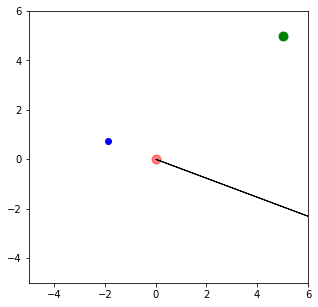

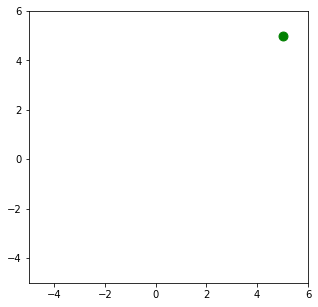

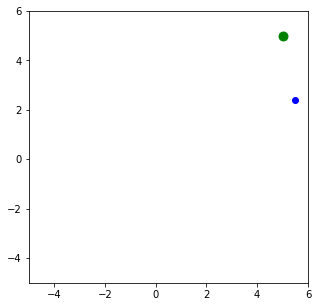

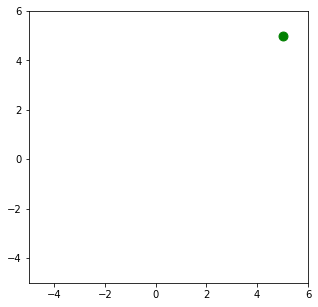

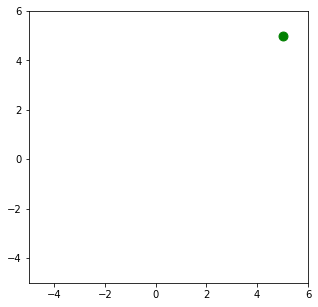

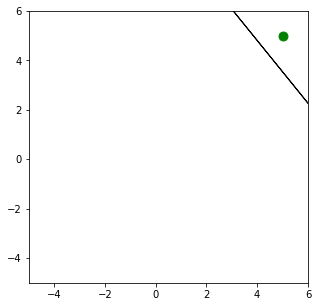

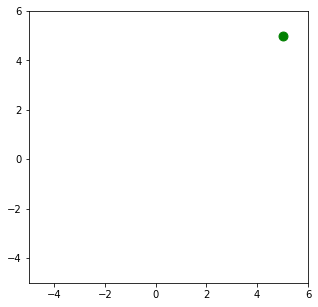

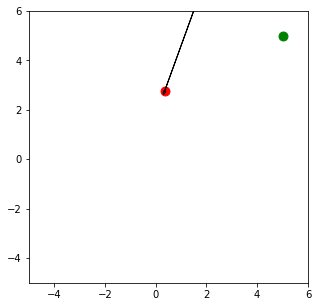

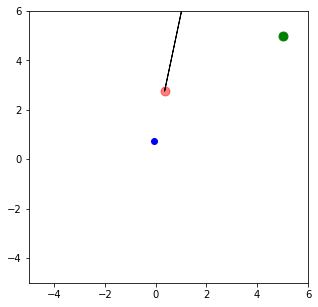

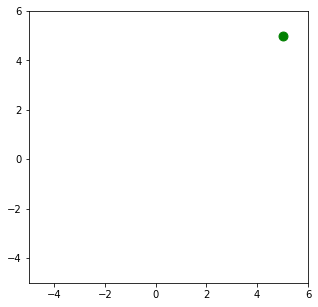

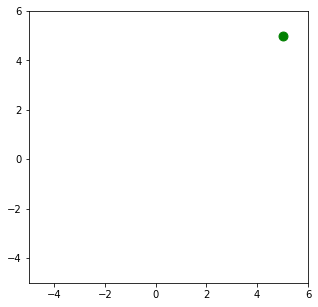

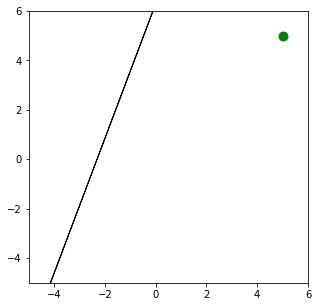

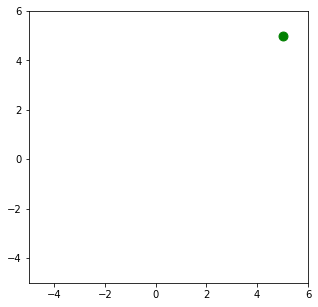

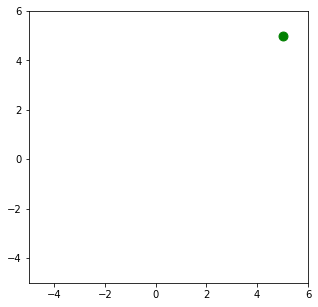

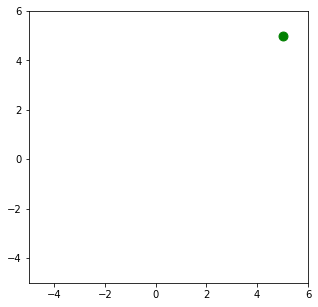

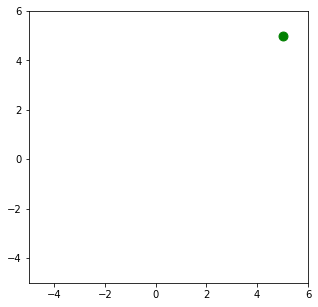

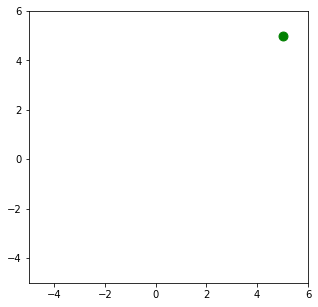

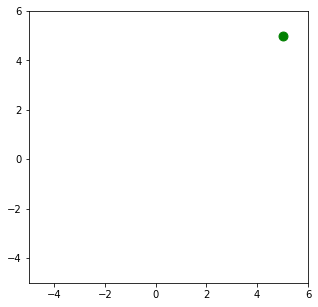

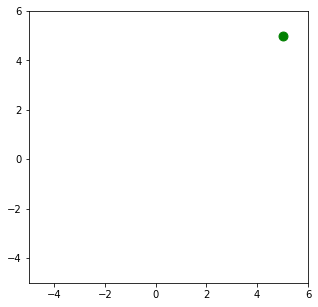

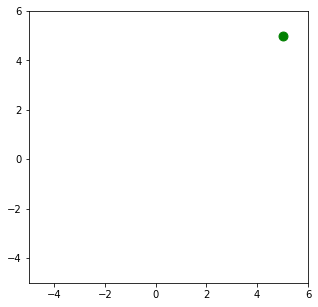

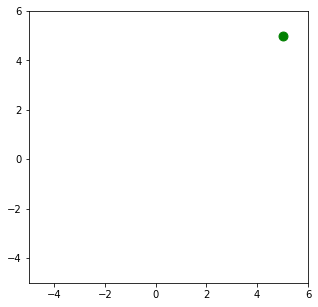

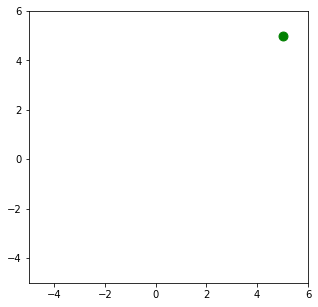

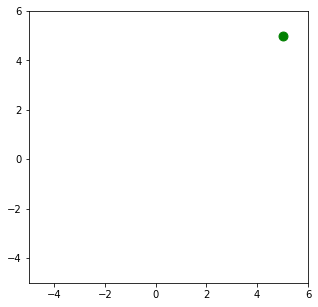

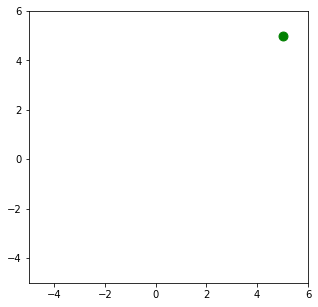

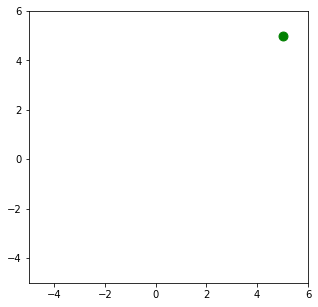

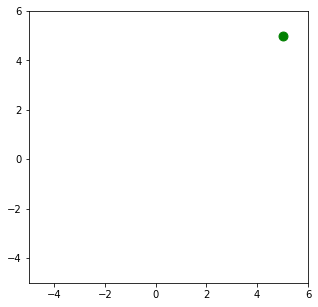

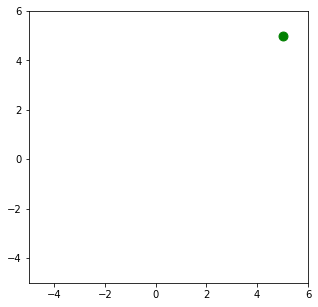

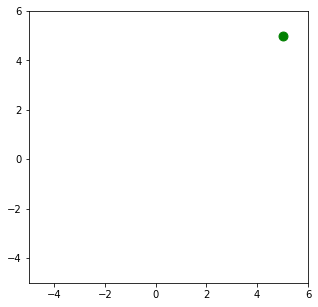

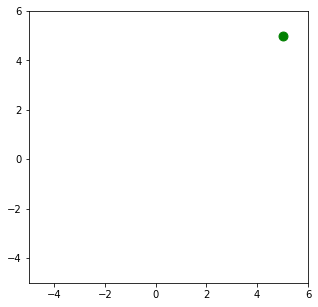

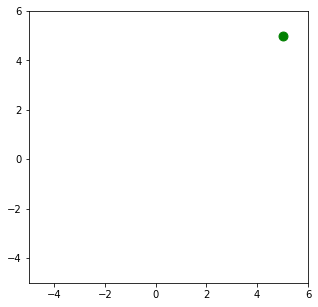

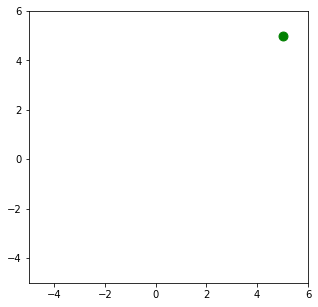

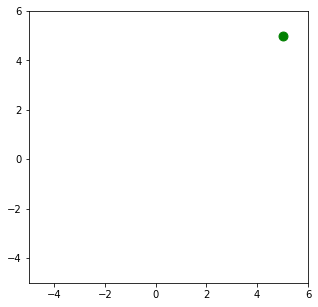

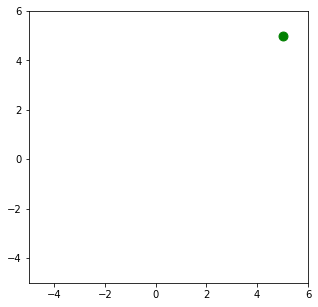

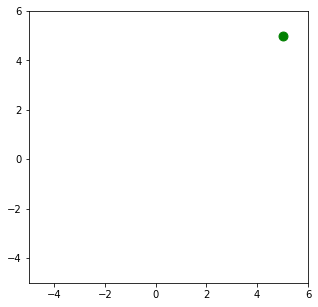

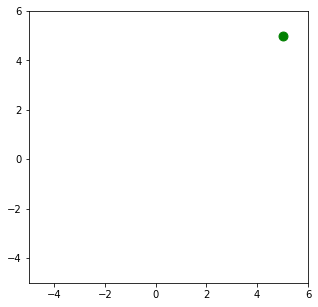

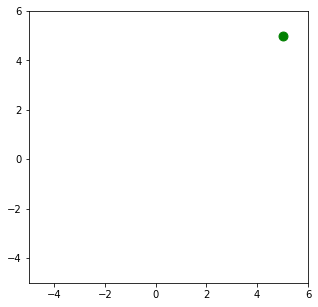

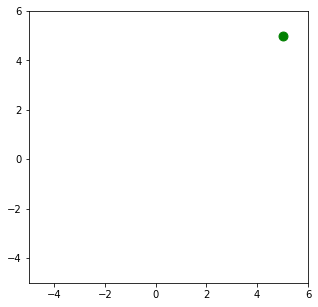

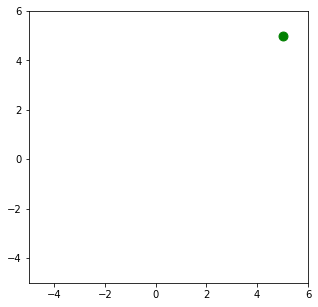

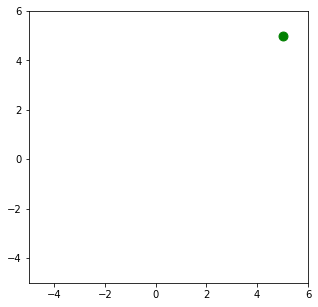

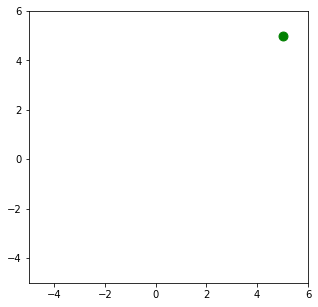

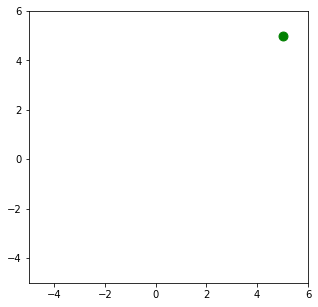

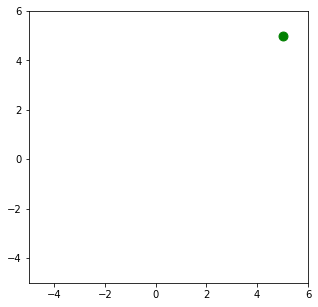

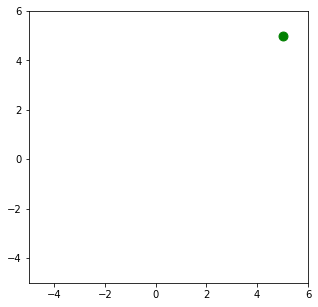

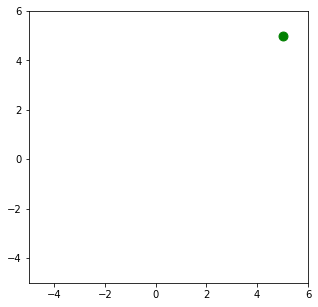

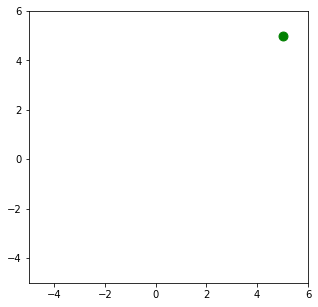

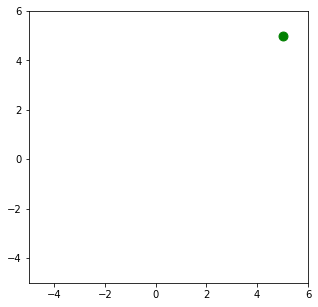

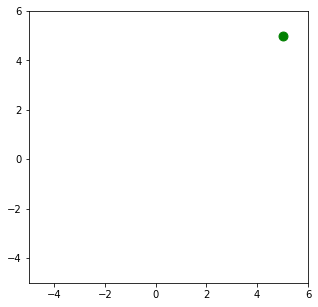

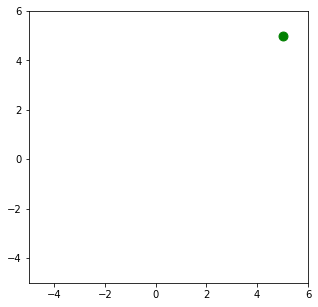

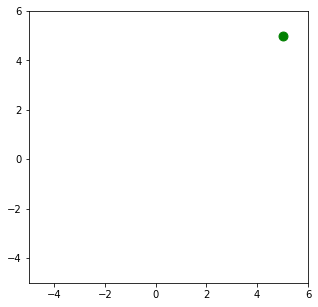

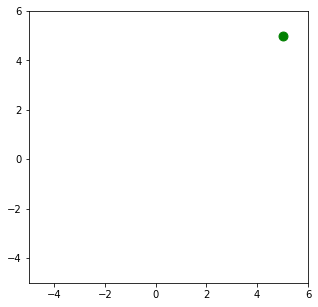

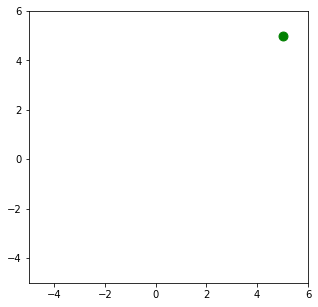

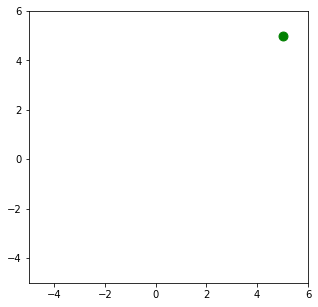

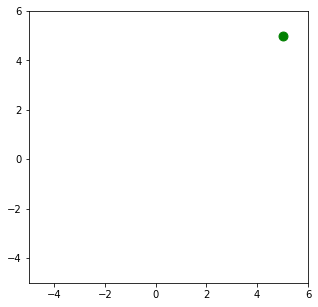

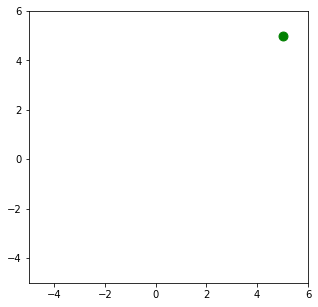

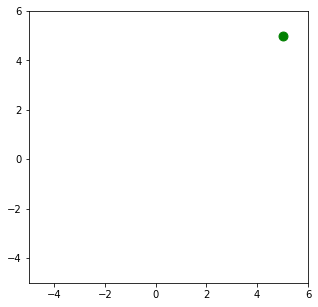

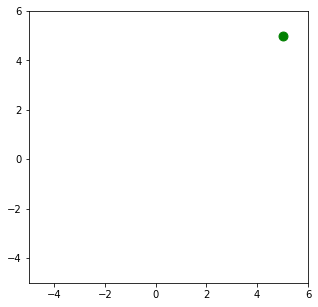

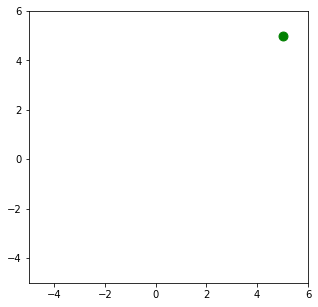

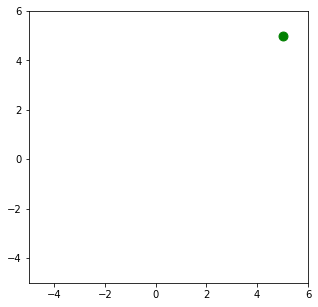

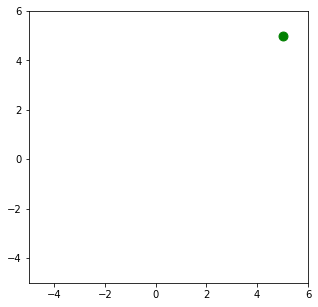

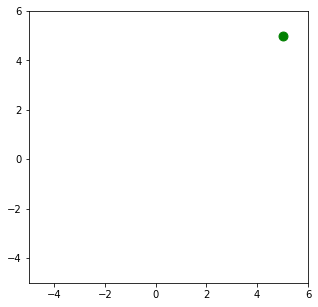

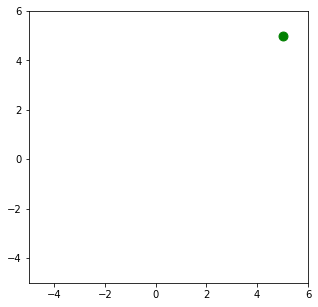

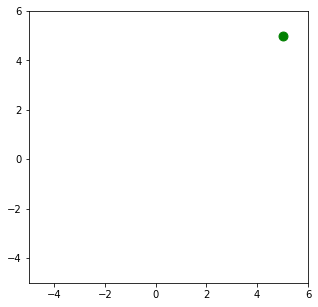

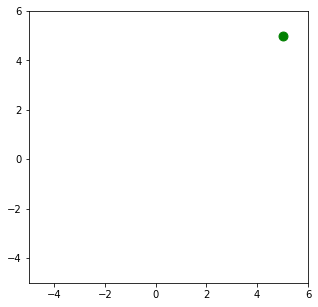

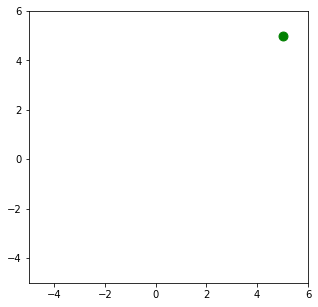

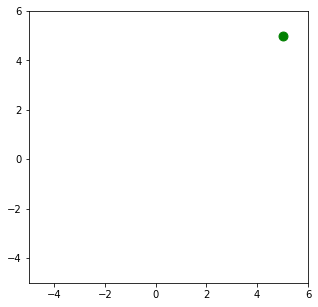

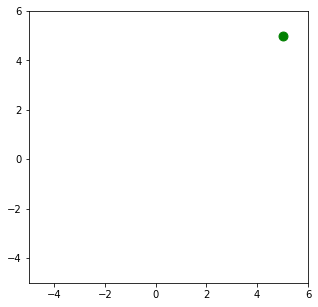

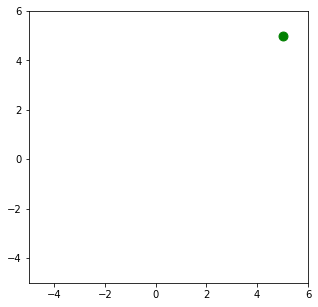

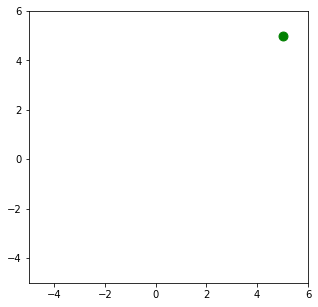

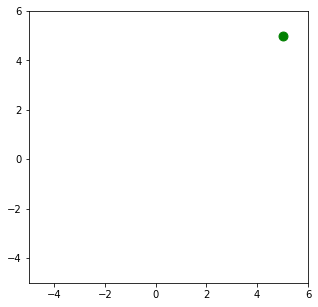

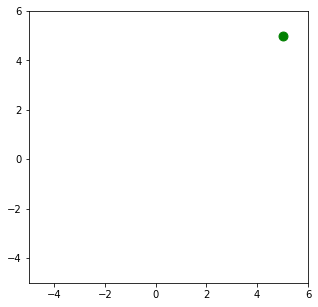

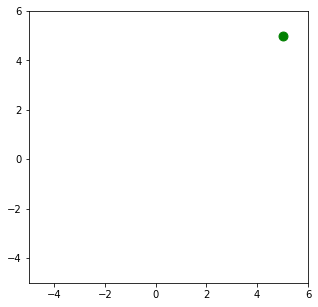

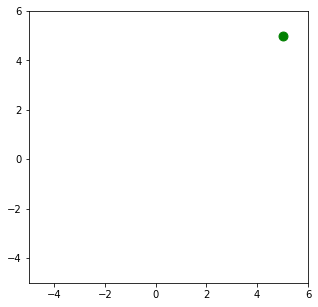

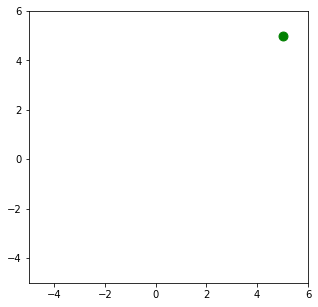

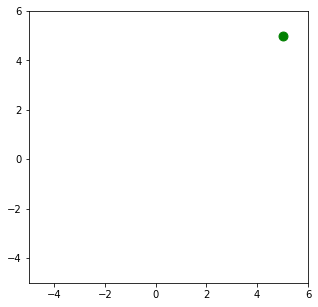

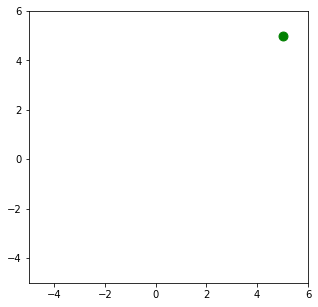

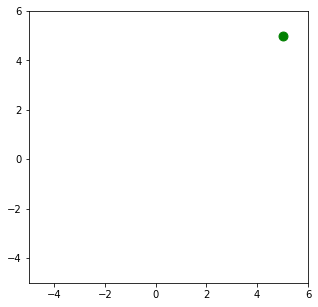

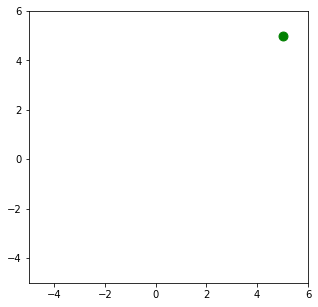

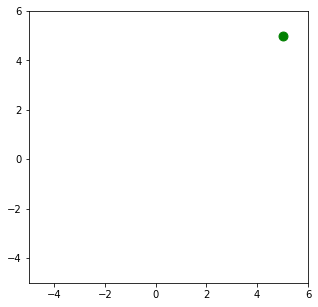

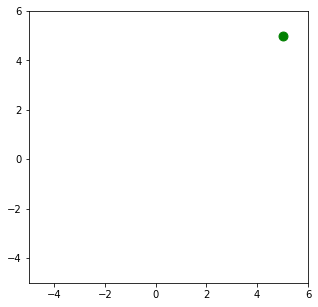

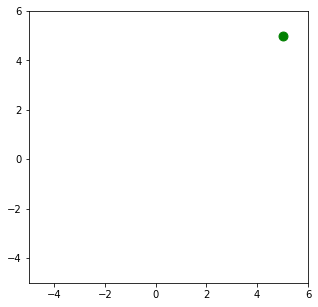

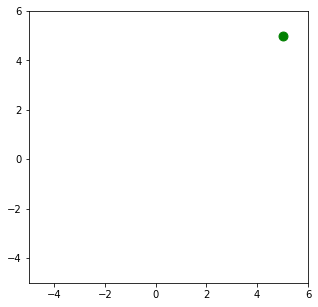

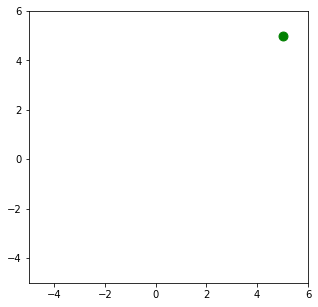

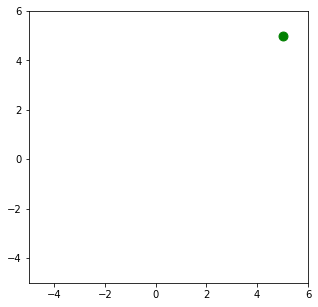

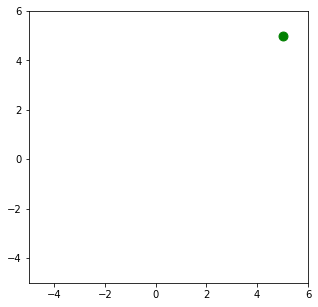

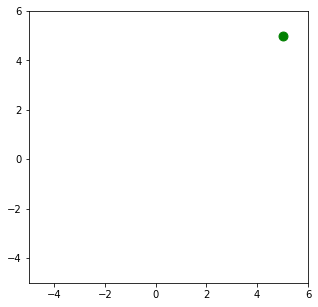

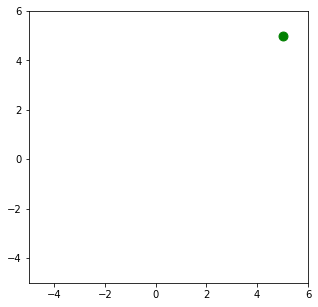

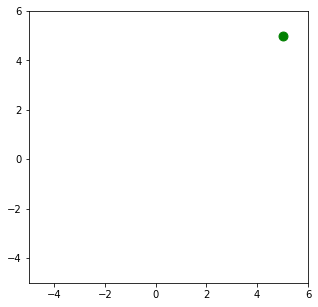

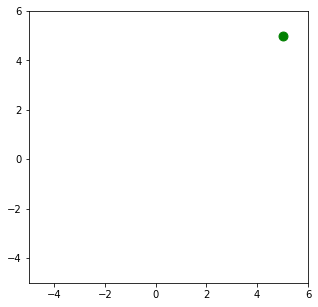

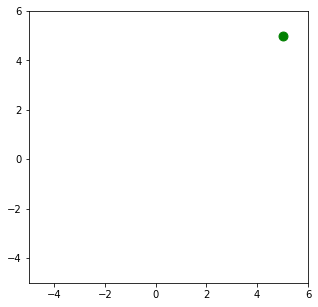

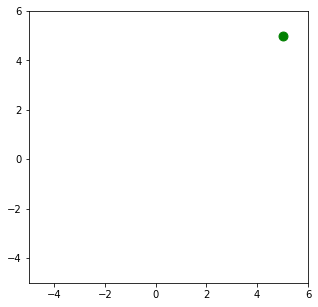

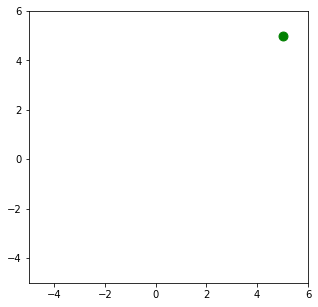

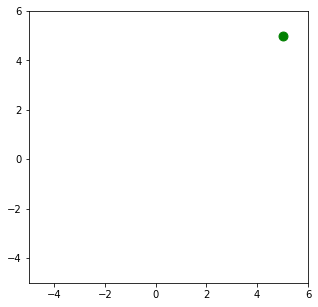

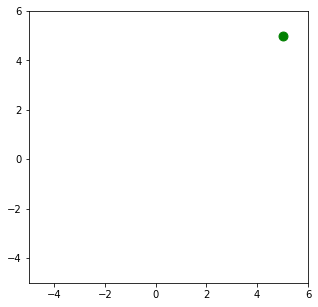

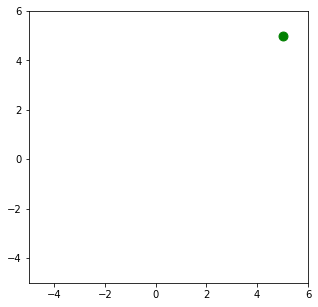

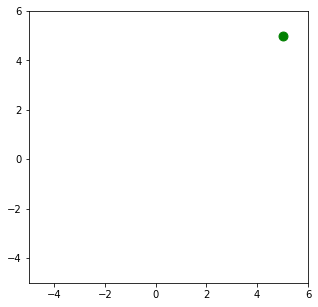

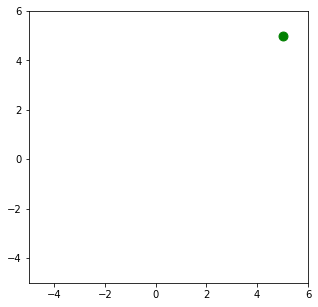

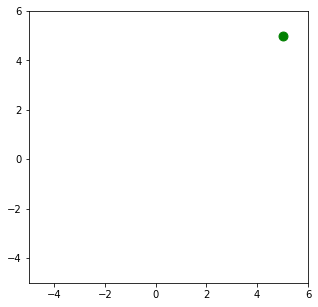

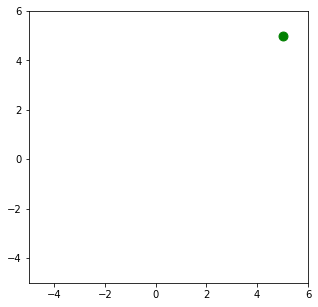

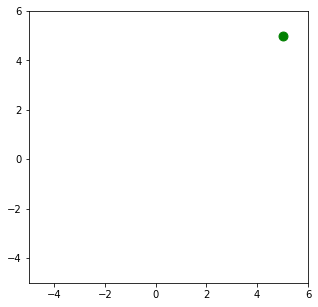

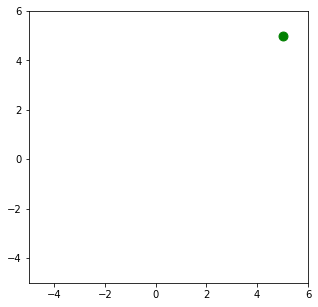

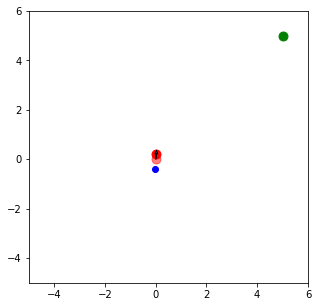

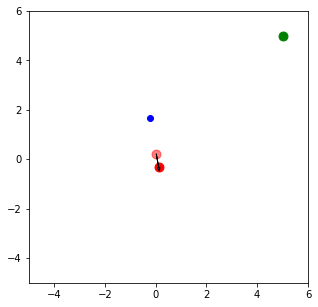

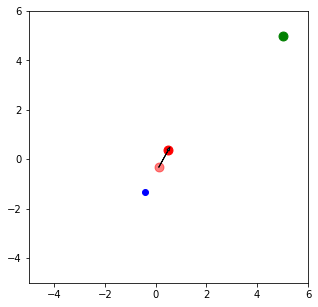

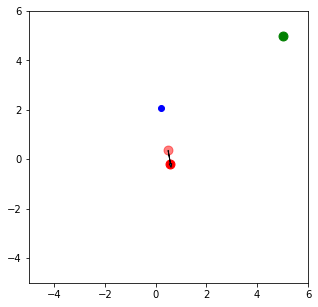

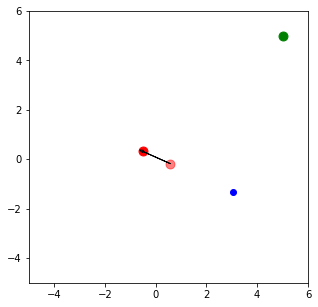

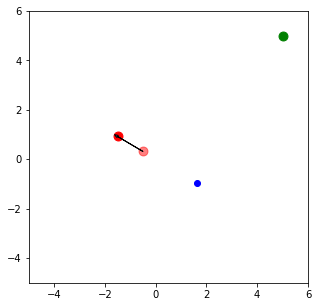

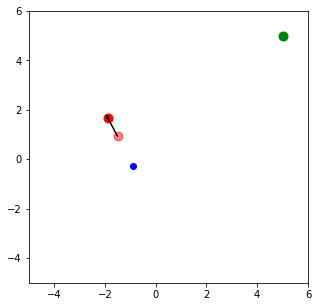

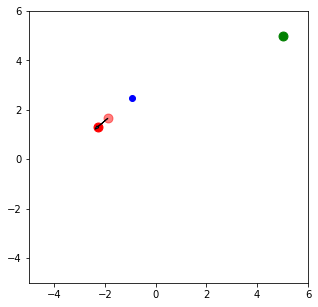

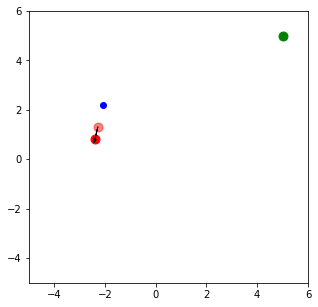

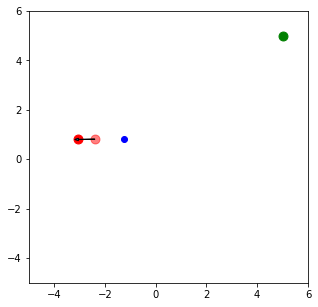

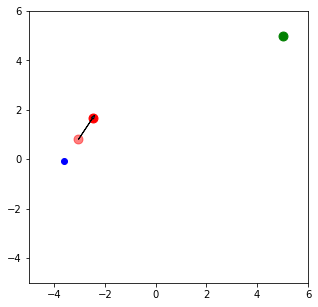

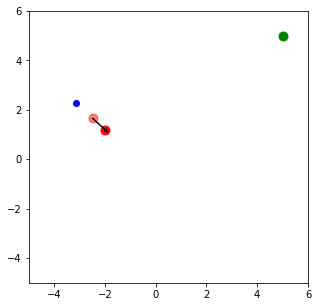

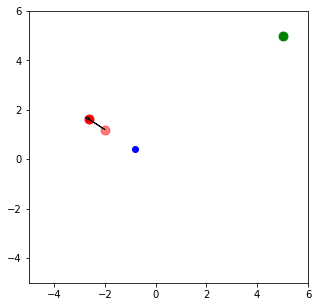

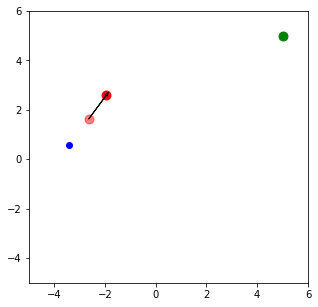

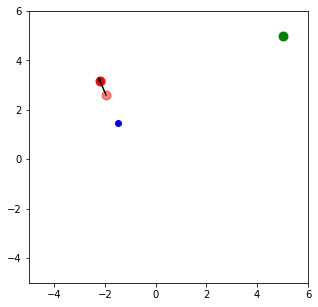

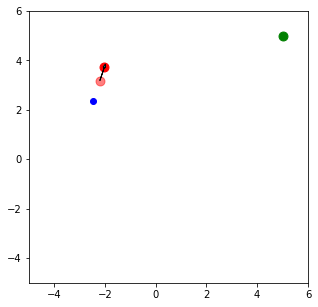

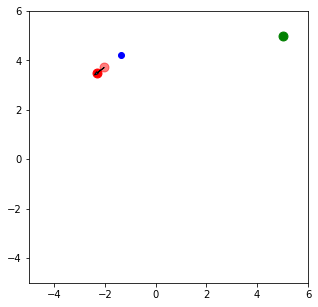

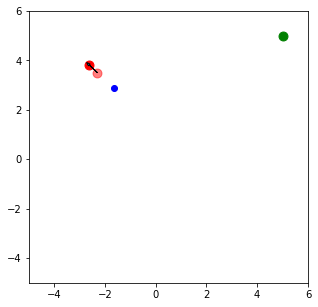

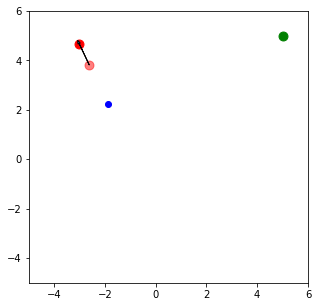

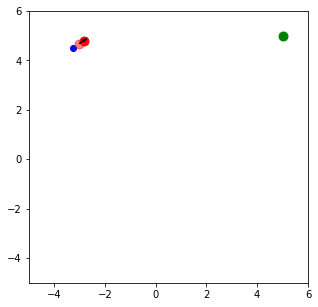

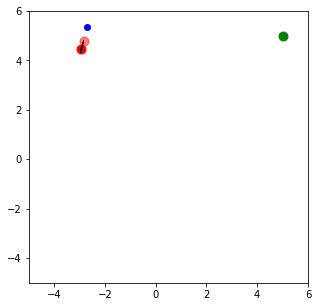

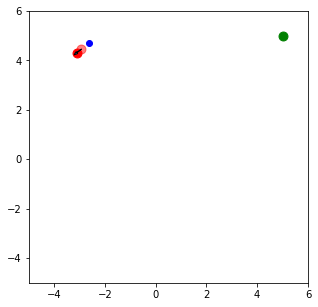

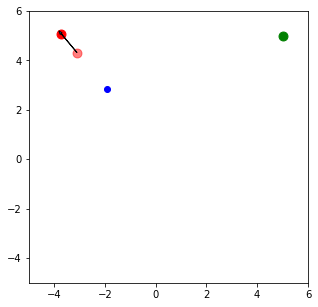

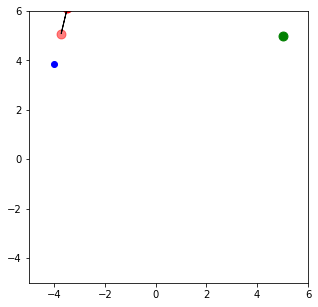

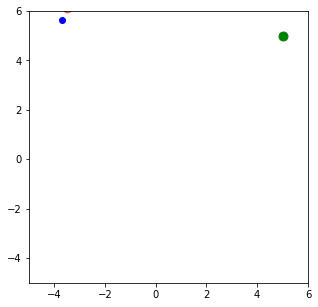

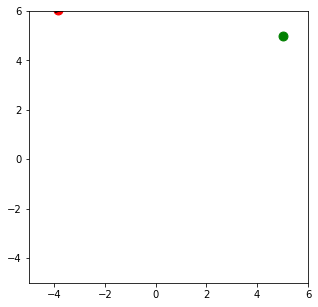

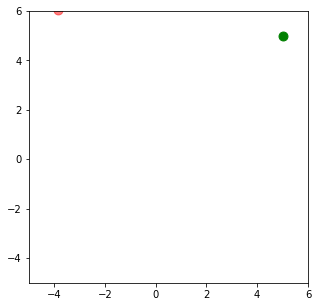

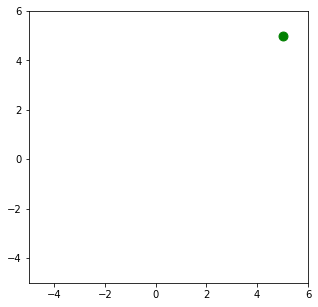

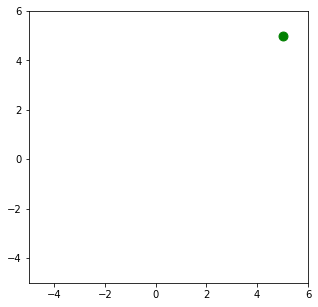

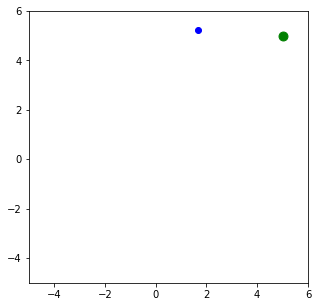

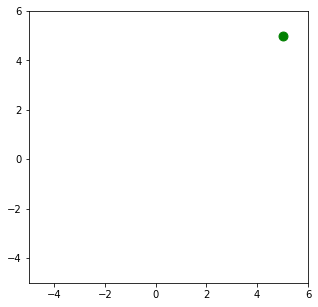

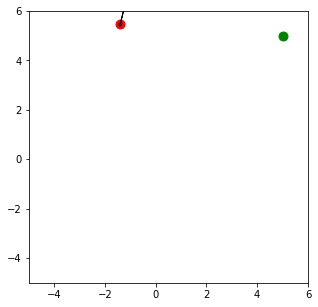

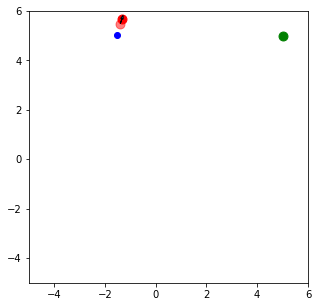

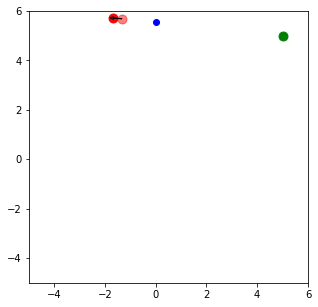

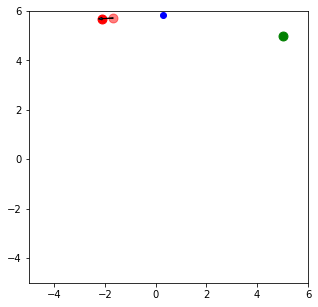

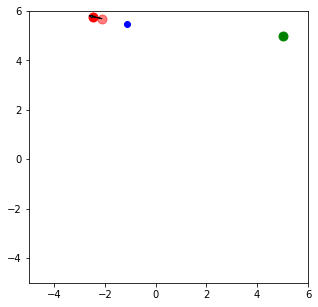

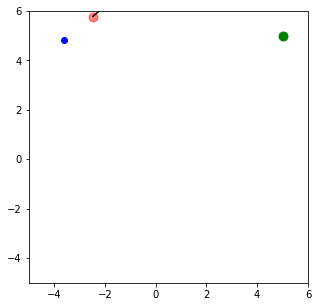

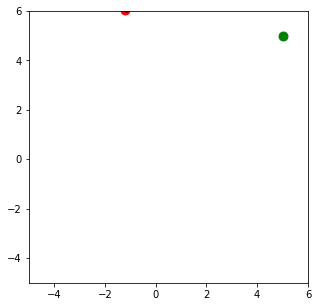

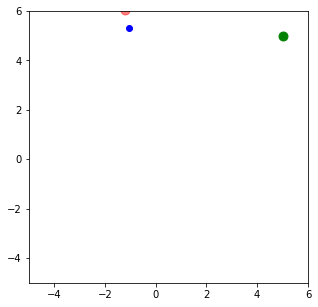

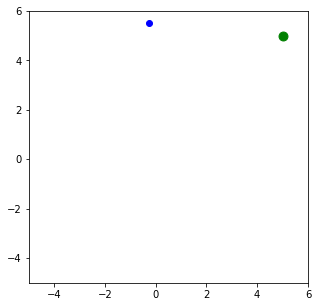

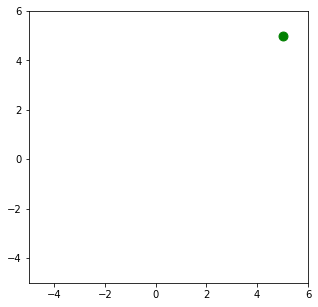

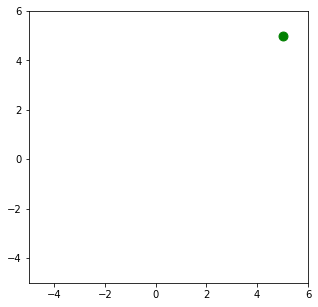

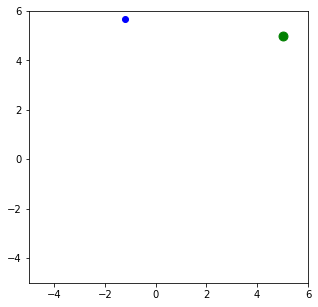

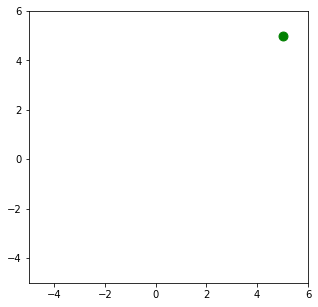

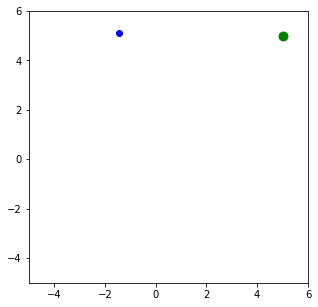

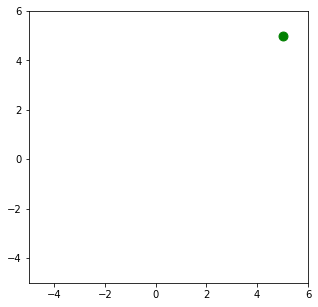

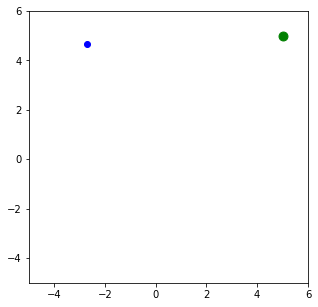

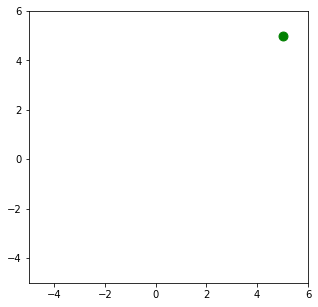

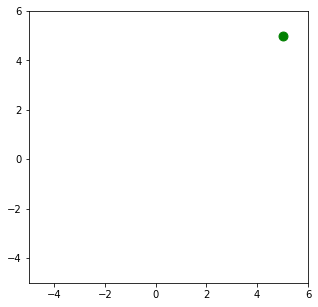

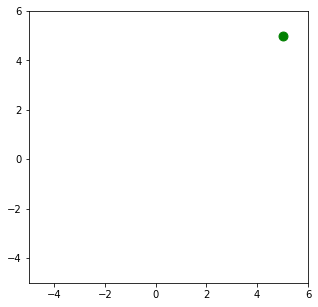

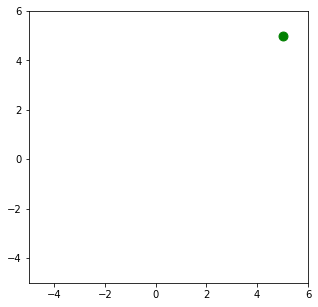

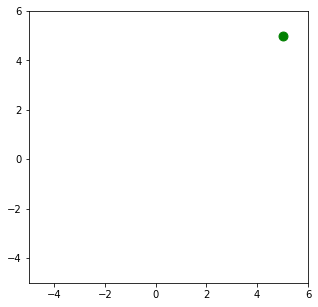

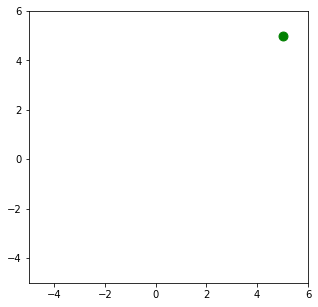

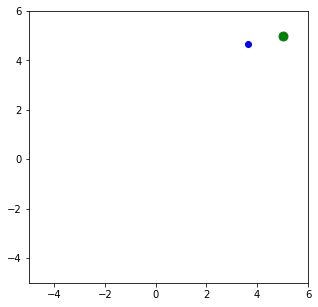

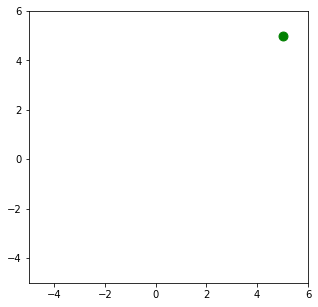

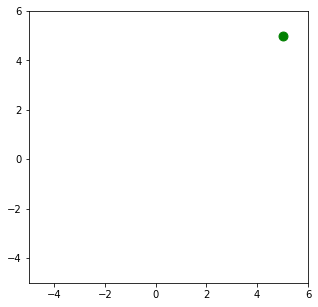

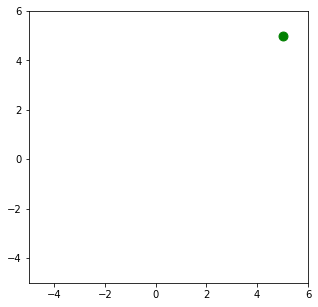

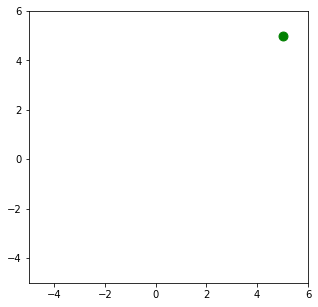

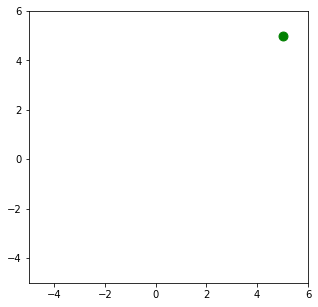

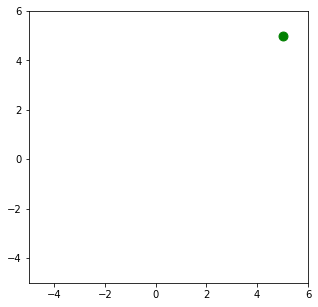

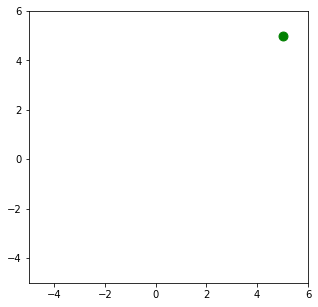

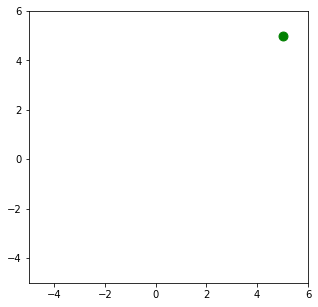

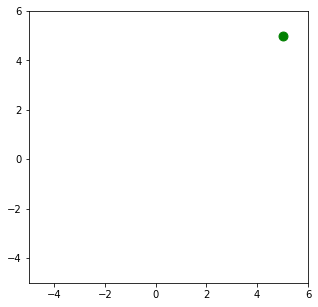

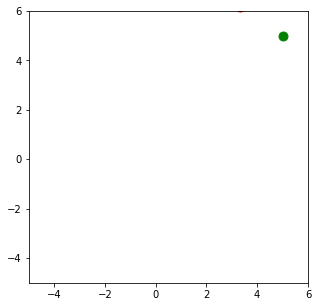

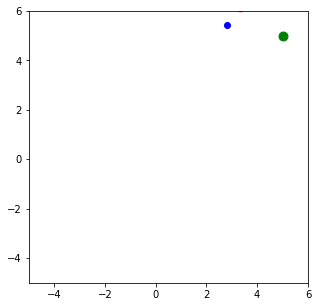

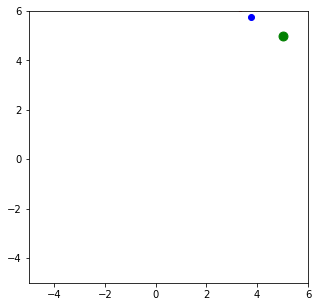

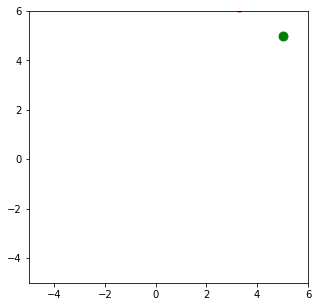

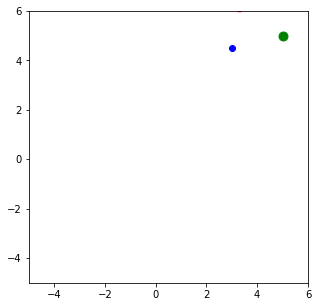

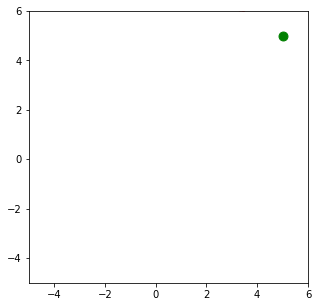

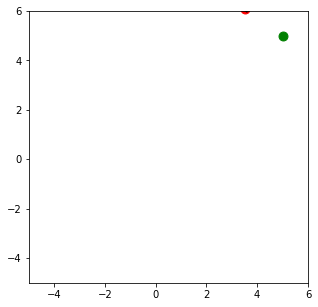

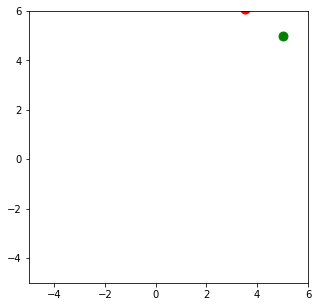

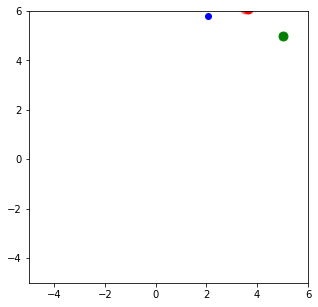

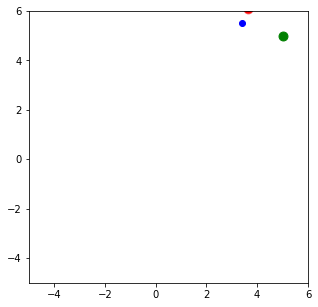

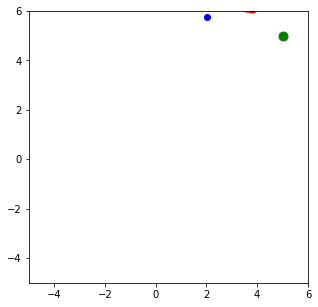

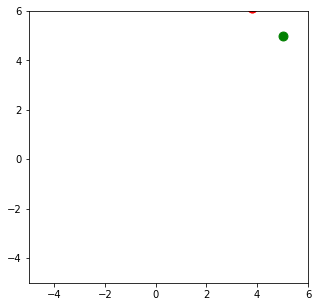

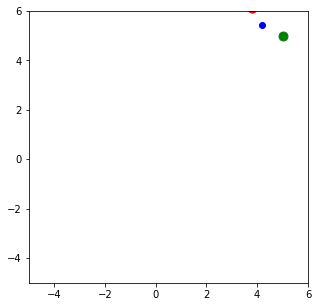

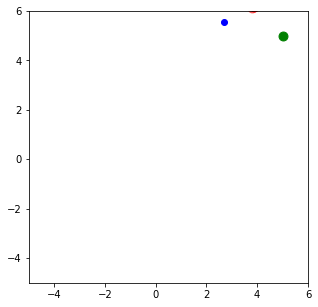

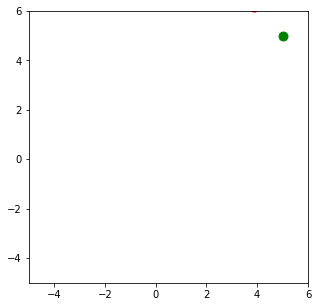

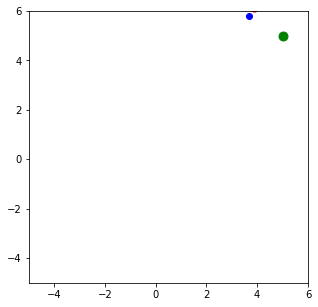

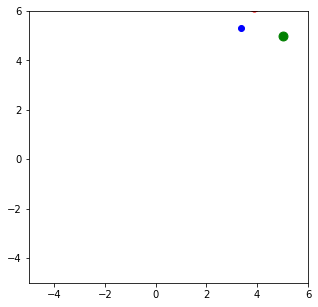

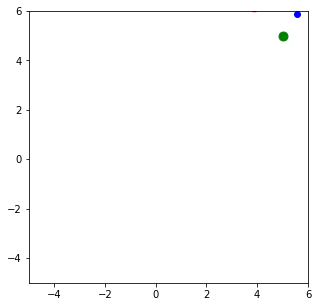

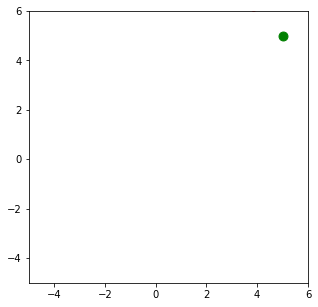

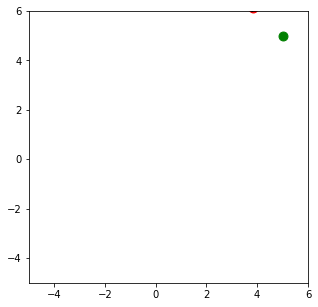

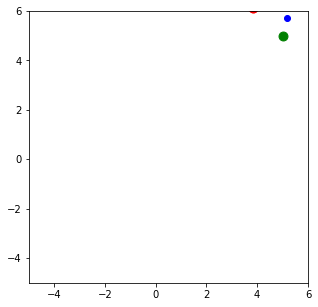

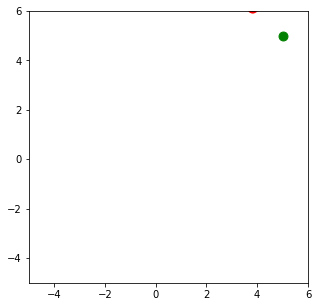

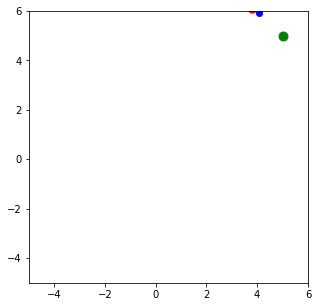

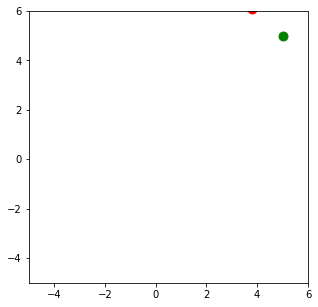

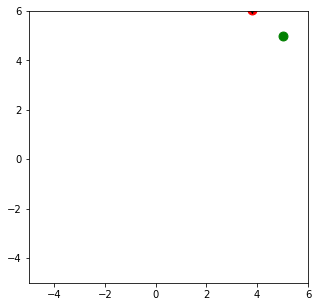

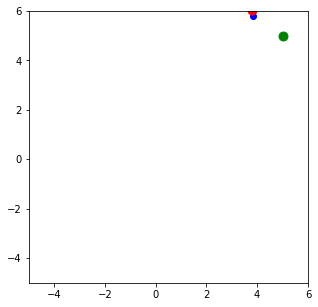

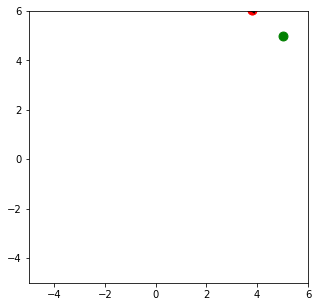

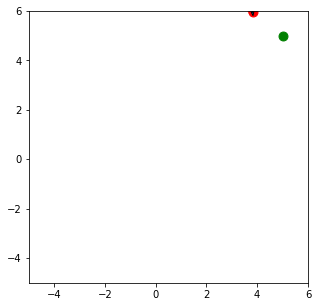

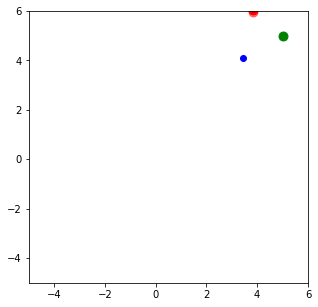

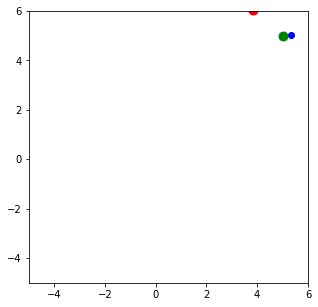

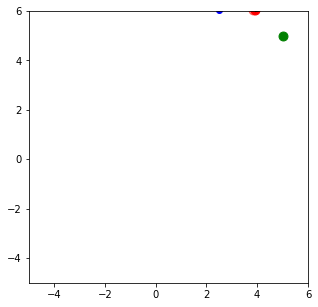

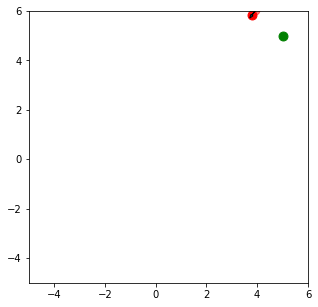

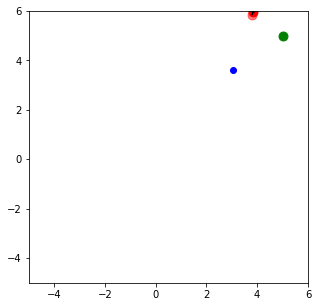

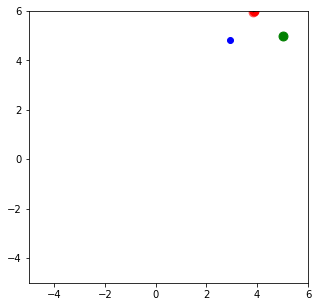

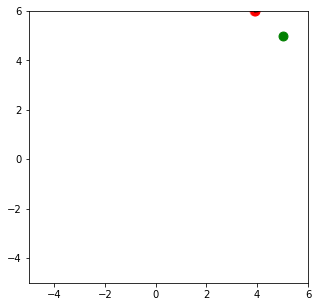

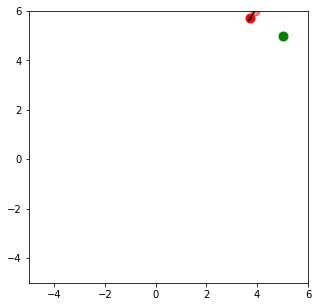

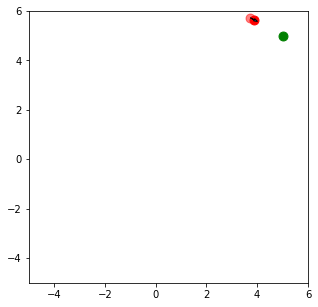

In [29]:
## unstable learning rate
print('Unstable------------')
train(mu, target, loss, lr=0.1, n_train=1, n_test=100, n_iter=100, viz=True)
print()

## stable learning rate
print('Stable-----------')
train(mu, target, loss, lr=0.01, n_train=1, n_test=100, n_iter=100, viz=True)

Increasing `n_train` improve the stability of the training. Now `lr = 0.1` and greater still works well.
We can learn much faster due to larger learning rate.

This is because the gradient signal given by `1` training datapoint is too noisy/wrong.
If we sample a datapoint closer to `target` then we end up pushing `mu` away from `target`.

Increasing `n_train` lowers the variance of the gradient, making the training more stable.
However, this solution quickly become intractable for high dimensional distributions.
The number of samples needed to reliably estimate $\mathbb{E}_{q_\phi (x)}[f(x)]$ grows
exponentially with the number of dimensions of $q_\phi$.

0 29.109063588992512
1 20.55698842123846
2 14.223361979620188
3 10.333775185201402
4 7.358992291333867
5 5.749549347328065
6 3.9387752017465076
7 3.7666026064801197
8 3.490284635809591
9 2.8156138831693562
10 2.259827058713741
11 2.35824375080199
12 2.148275498581975
13 2.248646083812939
14 2.1659844908612476
15 1.9170770263029422
16 2.0322778870253284
17 2.308088311059683
18 2.198883158440711
19 1.8576827923222405
20 2.100963222669507
21 1.92862199197058
22 2.188869058841247
23 1.8504724597826683
24 2.1210387565674513
25 2.239587001124181
26 1.988973623027527
27 1.7577142885225832
28 1.7305689969129292
29 2.0995253589513077
30 2.3188752408465243
31 2.1028821784243887
32 1.8059866344816549
33 1.8759258888416301
34 1.7681247730927714
35 1.8004901145116898
36 2.189354675259307
37 1.7847501025260895
38 1.9471452302782695
39 1.9212237545580737
40 2.31414876717798
41 1.888716578499366
42 1.9242956004147096
43 1.8781338152537952
44 2.080116374162425
45 1.99063912349636
46 1.8686061760922414


<ipython-input-28-c3a631883ca1>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))


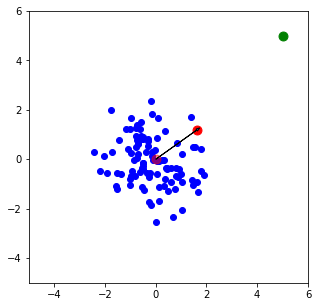

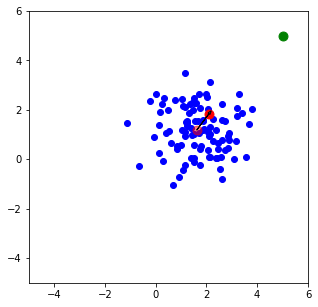

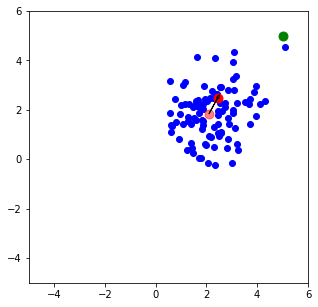

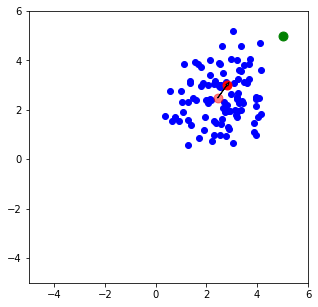

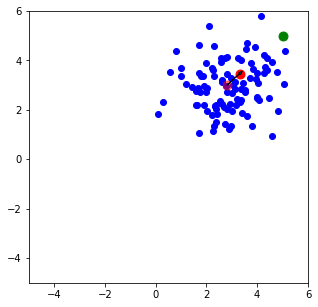

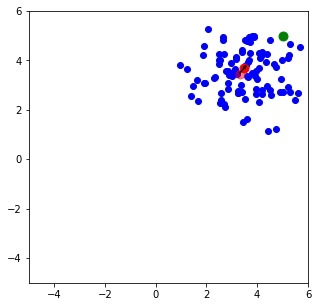

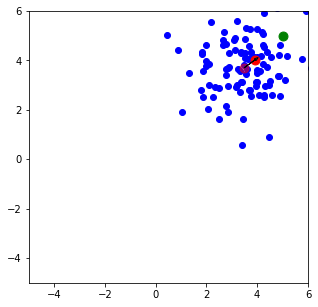

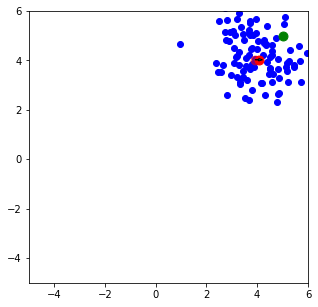

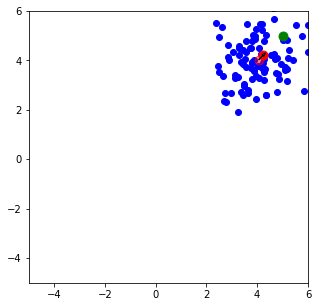

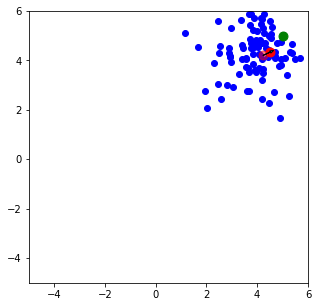

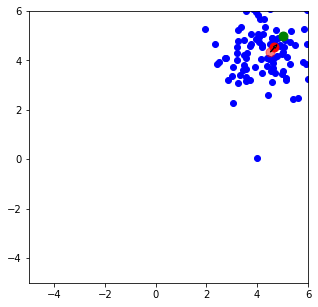

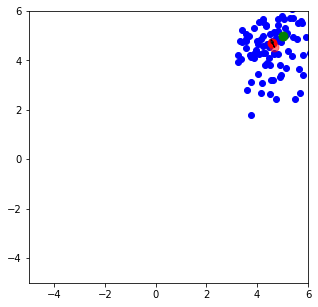

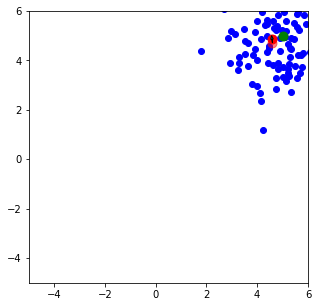

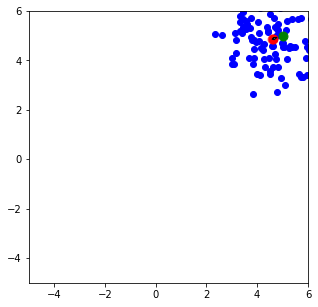

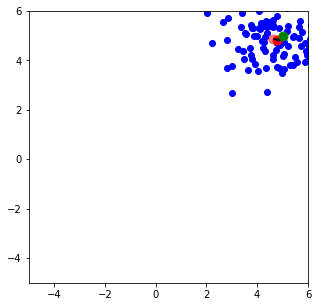

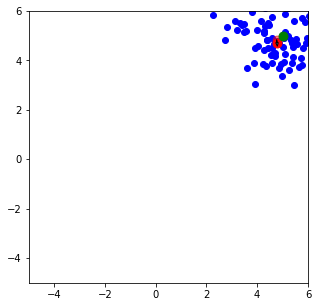

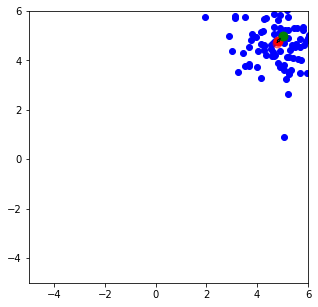

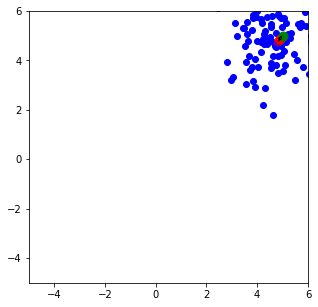

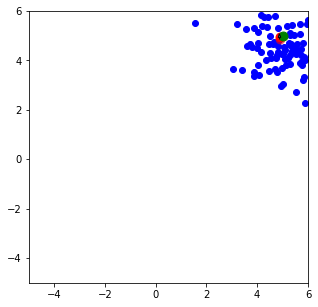

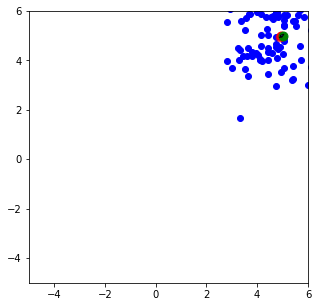

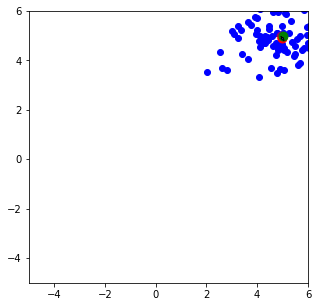

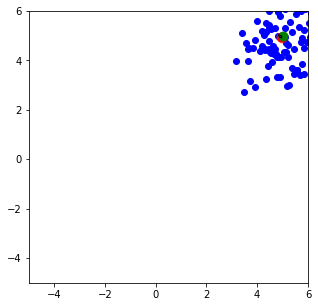

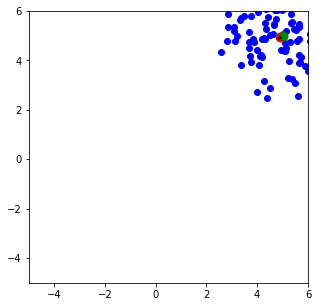

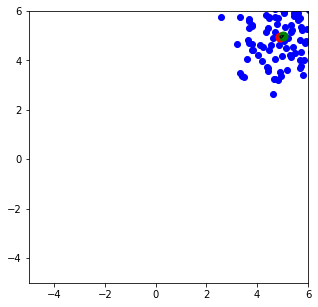

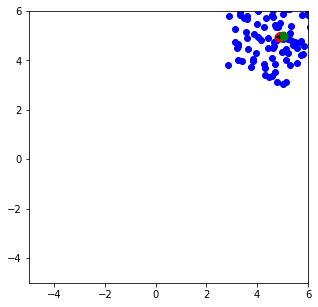

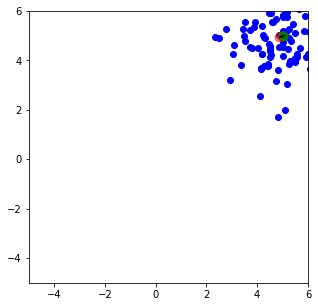

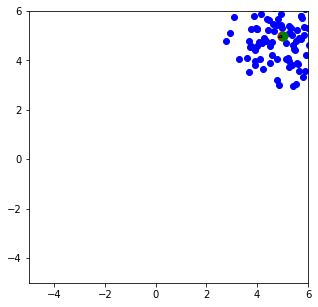

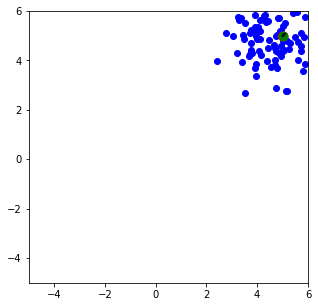

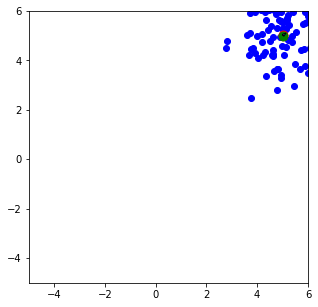

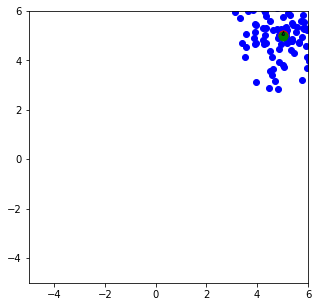

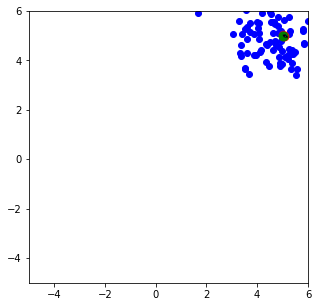

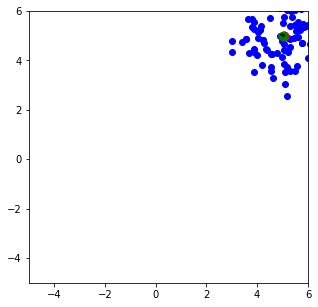

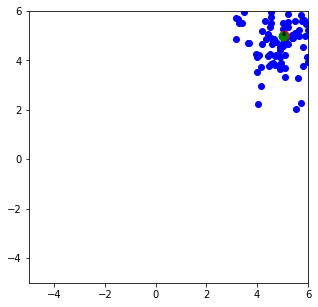

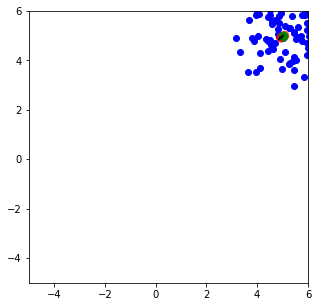

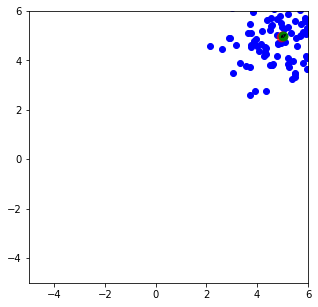

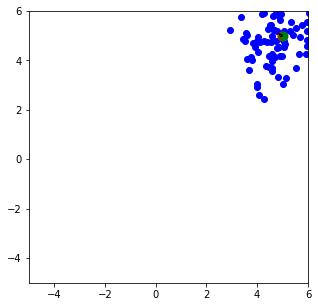

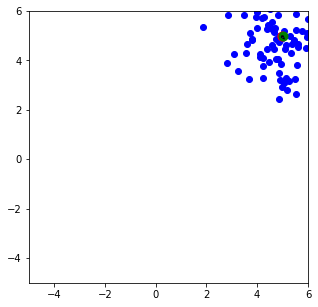

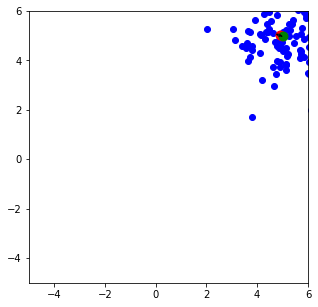

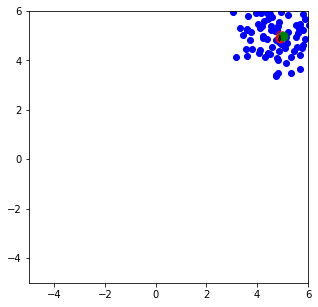

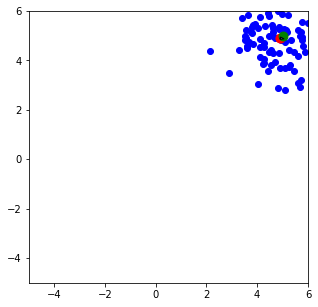

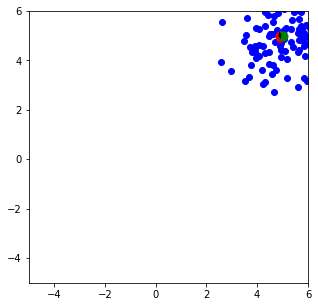

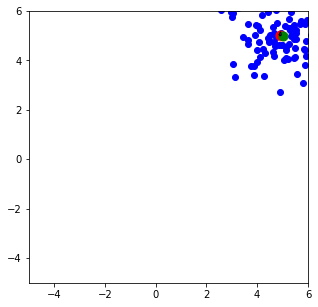

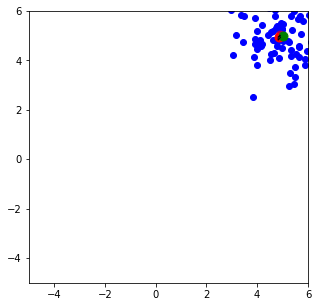

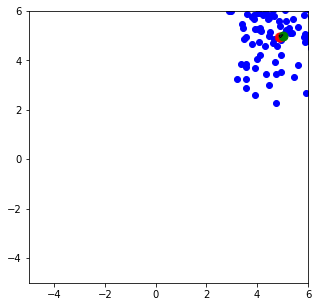

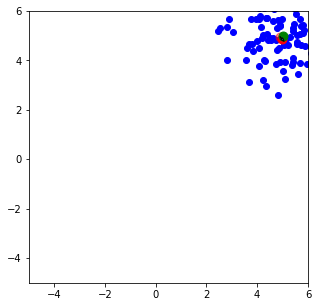

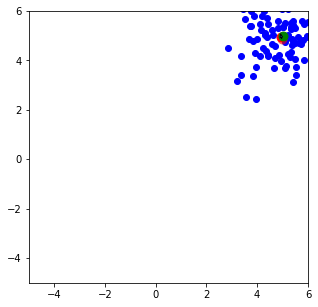

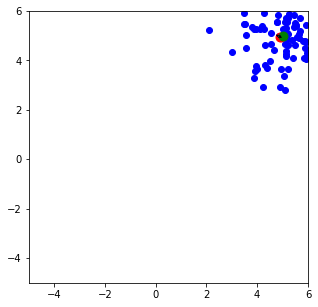

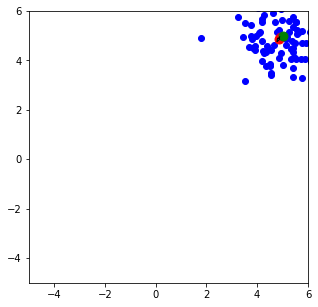

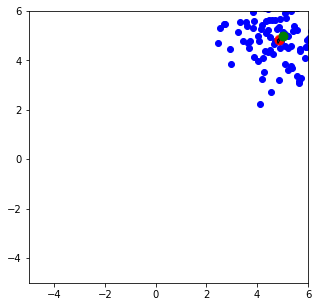

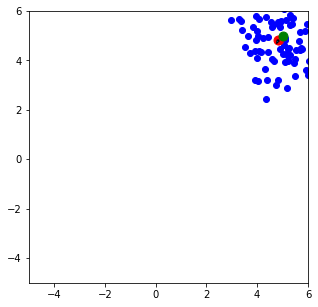

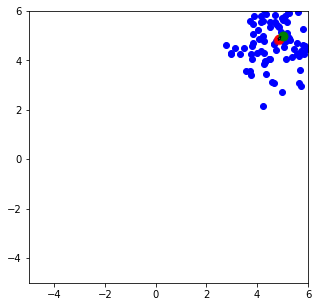

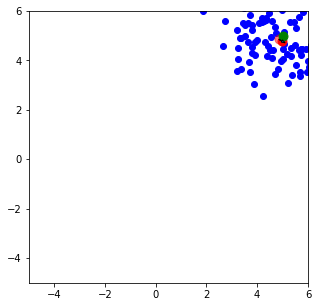

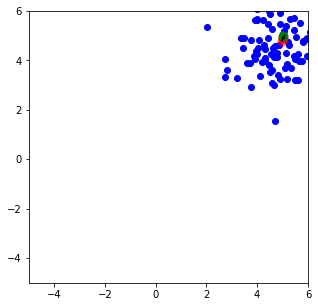

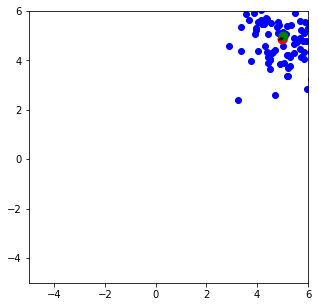

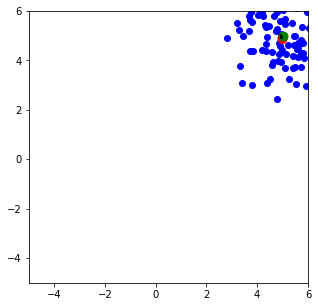

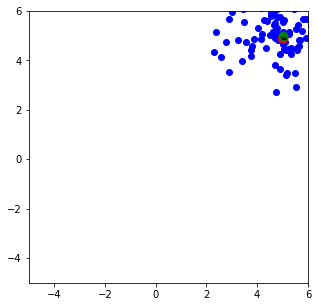

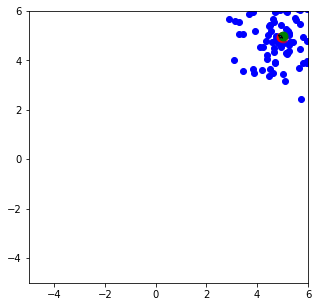

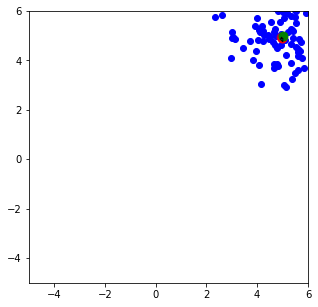

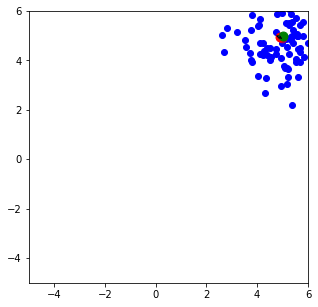

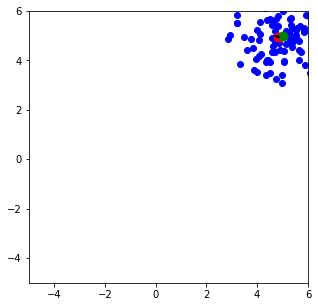

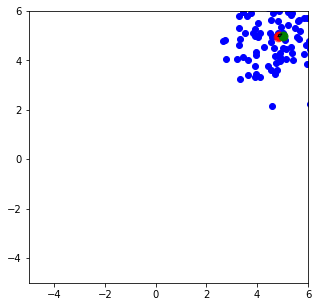

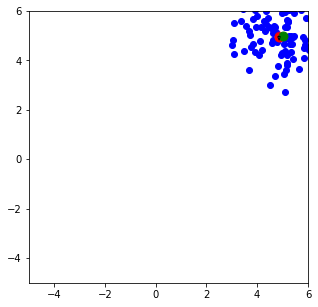

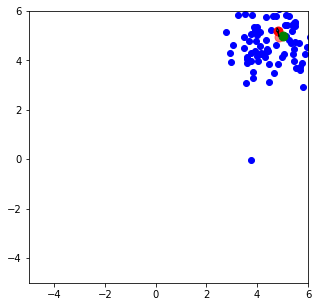

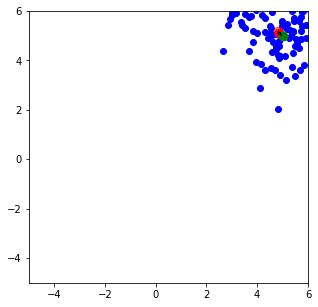

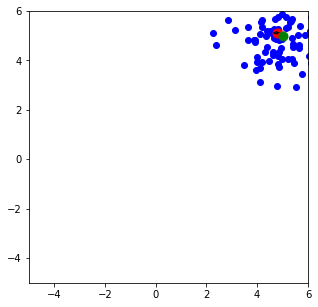

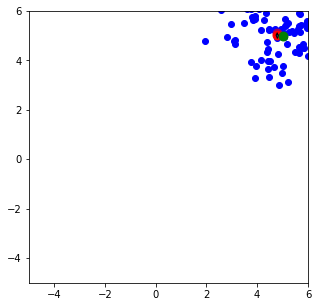

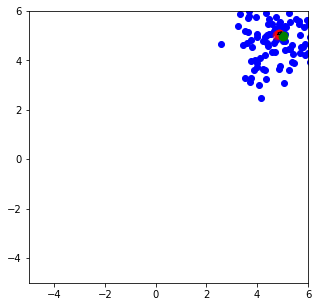

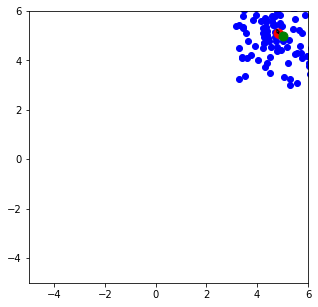

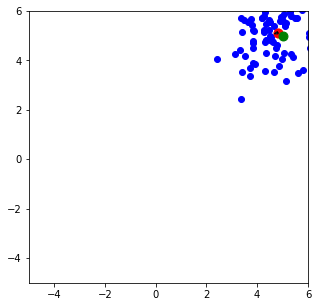

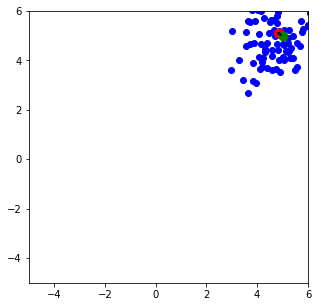

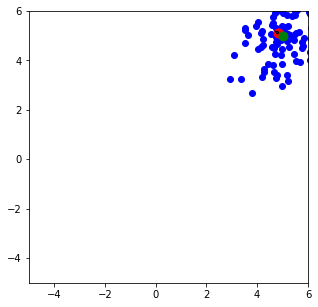

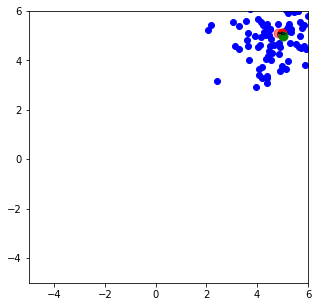

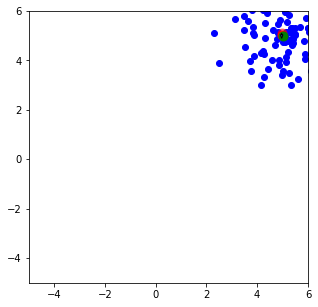

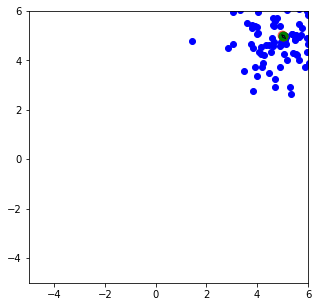

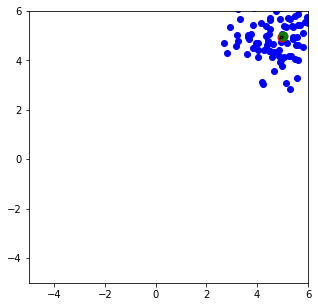

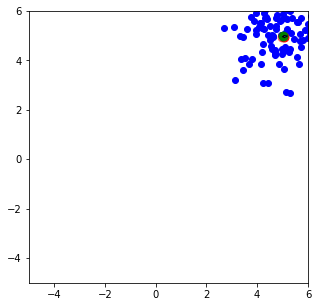

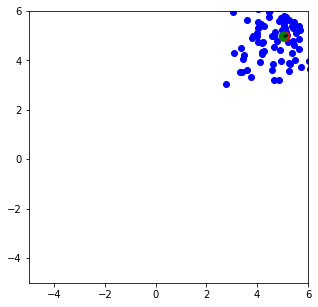

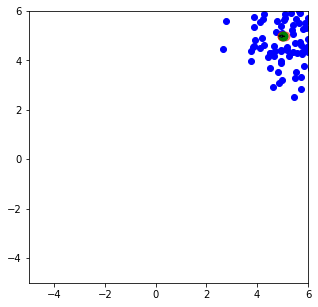

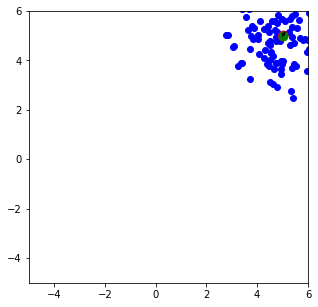

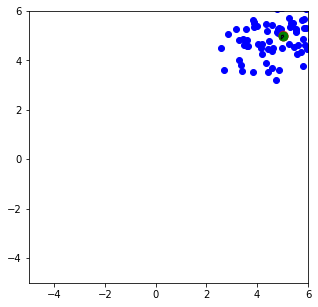

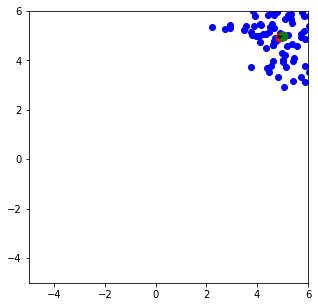

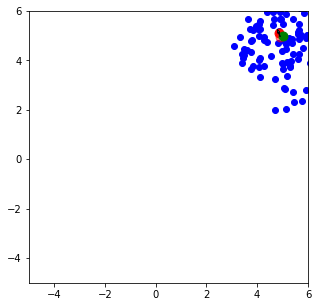

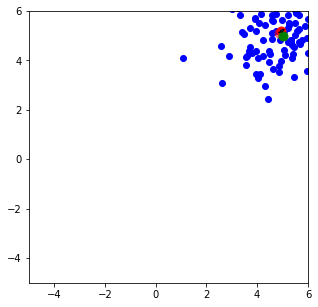

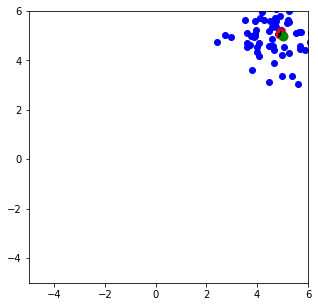

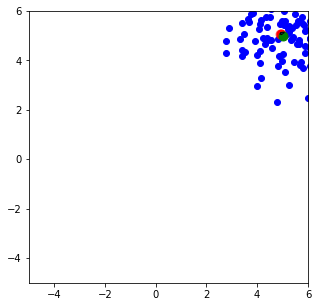

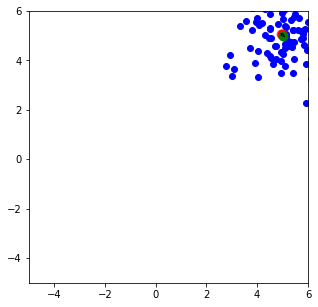

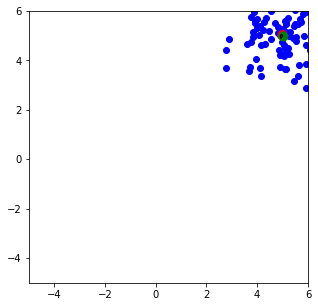

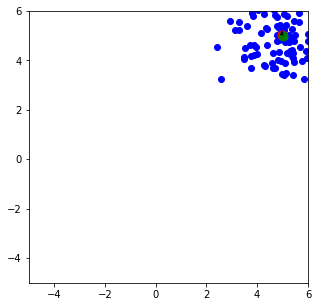

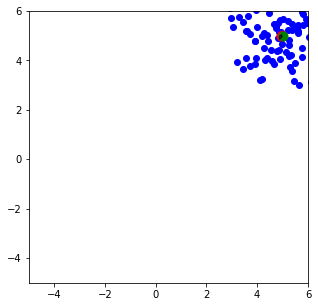

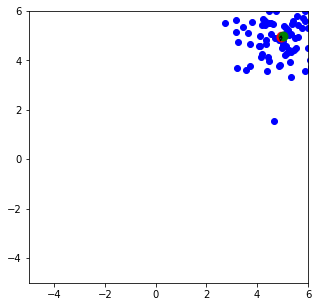

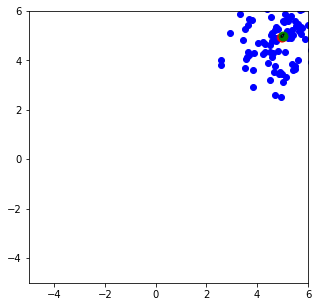

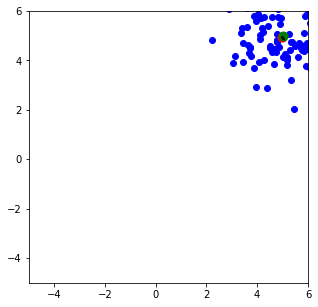

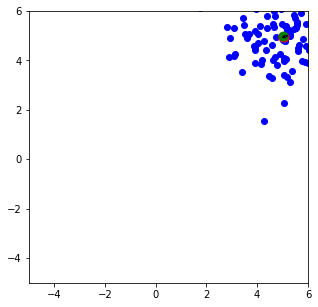

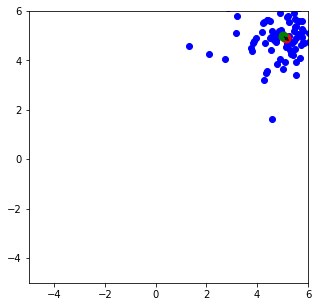

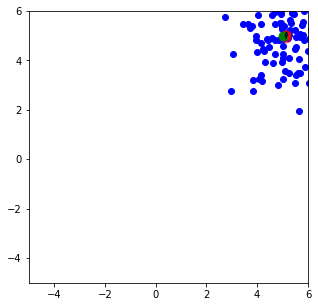

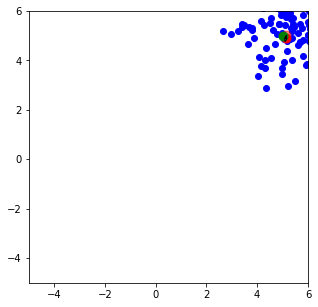

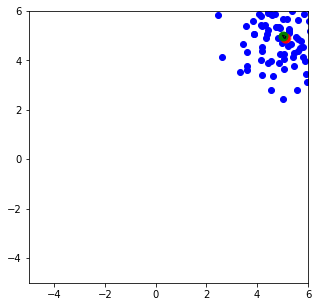

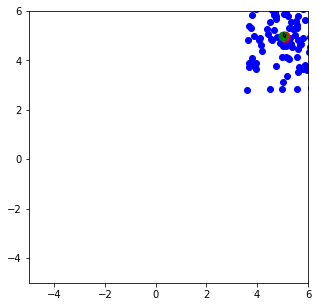

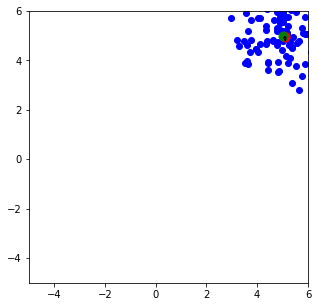

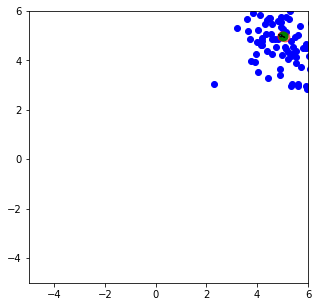

In [30]:
# train(mu, target, loss, lr=0.01, n_train=10, n_test=100, n_iter=100)

train(mu, target, loss, lr=0.1, n_train=100, n_test=100, n_iter=100, viz=True)